In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('my_movies.csv')

In [10]:
data.head()

V1       V2             V3  ... LOTR Braveheart  Green Mile
0  Sixth Sense    LOTR1  Harry Potter1  ...    0          0           1
1    Gladiator  Patriot     Braveheart  ...    0          1           0
2        LOTR1    LOTR2            NaN  ...    0          0           0
3    Gladiator  Patriot    Sixth Sense  ...    0          0           0
4    Gladiator  Patriot    Sixth Sense  ...    0          0           0

[5 rows x 15 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [12]:
movie = data.iloc[:,5:]

In [13]:
movie

Sixth Sense  Gladiator  LOTR1  ...  LOTR  Braveheart  Green Mile
0            1          0      1  ...     0           0           1
1            0          1      0  ...     0           1           0
2            0          0      1  ...     0           0           0
3            1          1      0  ...     0           0           0
4            1          1      0  ...     0           0           0
5            1          1      0  ...     0           0           0
6            0          0      0  ...     0           0           0
7            0          1      0  ...     0           0           0
8            1          1      0  ...     0           0           0
9            1          1      0  ...     1           0           1

[10 rows x 10 columns]

### Apriori Algorithm

#### 1.Association rule with 10% Support and 70% Confidence

In [14]:
# With 10% Support
set = apriori(movie,min_support=0.1,use_colnames=True)

In [15]:
set

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Sixth Sense, Gladiator, Patriot)
31      0.1                     (LOTR, Sixth Sense, Gladiator)
32      0.1               (Green Mile, Sixth Sense, Gladiator)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (Harry Potter1, Sixth Sense, LOTR2)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (Green Mile, Sixth Sense, LOTR2)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Gladiator, Braveheart, Patriot)
41      0.1                      (Green Mile, LOTR, Gladiator)
42      0.1                      (Harry Potter1, LOTR2, LOTR1)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (Green Mile, LOTR2, LOTR1)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Green Mile, LOTR, Sixth Sense, Gladiator)
47      0.1         (Harry Potter1, LOTR2, Sixth Sense, LOTR1)
48      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR1)
49      0.1            (Green Mile, LOTR2, Sixth Sense, LOTR1)
50      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR2)
51      0.1          (Green Mile, LOTR2, Harry Potter1, LOTR1)
52      0.1  (Harry Potter1, LOTR2, Sixth Sense, LOTR1, Gre...

In [16]:
# With 70% Confidence

rule = association_rules(set,metric='lift',min_threshold=0.7)

In [17]:
rule

antecedents  ... zhangs_metric
0      (Sixth Sense)  ...      0.400000
1        (Gladiator)  ...      0.533333
2      (Sixth Sense)  ...     -0.333333
3            (LOTR1)  ...     -0.200000
4    (Harry Potter1)  ...     -0.200000
..               ...  ...           ...
245  (Harry Potter1)  ...      1.000000
246          (LOTR2)  ...      1.000000
247    (Sixth Sense)  ...      1.000000
248          (LOTR1)  ...      1.000000
249     (Green Mile)  ...      1.000000

[250 rows x 10 columns]

### Visualization

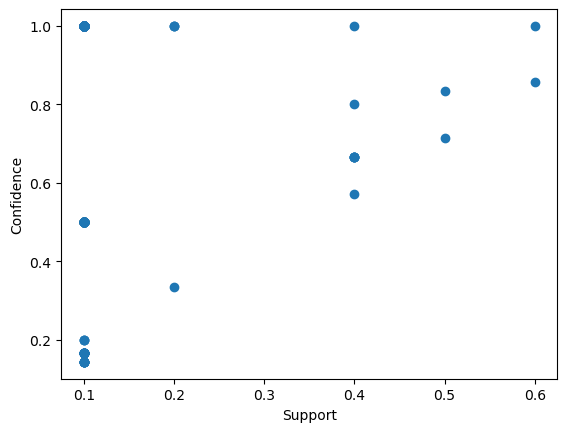

In [18]:

plt.scatter(rule['support'],rule['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

#### 2.Association rule with 5% Support and 80% Confidence

In [20]:
# With 5% Support
set1 = apriori(movie,min_support=0.05,use_colnames=True)

In [21]:
set1

support                                           itemsets
0       0.6                                      (Sixth Sense)
1       0.7                                        (Gladiator)
2       0.2                                            (LOTR1)
3       0.2                                    (Harry Potter1)
4       0.6                                          (Patriot)
5       0.2                                            (LOTR2)
6       0.1                                    (Harry Potter2)
7       0.1                                             (LOTR)
8       0.1                                       (Braveheart)
9       0.2                                       (Green Mile)
10      0.5                           (Sixth Sense, Gladiator)
11      0.1                               (Sixth Sense, LOTR1)
12      0.1                       (Harry Potter1, Sixth Sense)
13      0.4                             (Sixth Sense, Patriot)
14      0.1                               (LOTR2, Sixth Sense)
15      0.1                                (LOTR, Sixth Sense)
16      0.2                          (Green Mile, Sixth Sense)
17      0.6                               (Gladiator, Patriot)
18      0.1                                  (LOTR, Gladiator)
19      0.1                            (Gladiator, Braveheart)
20      0.1                            (Green Mile, Gladiator)
21      0.1                             (Harry Potter1, LOTR1)
22      0.2                                     (LOTR2, LOTR1)
23      0.1                                (Green Mile, LOTR1)
24      0.1                             (Harry Potter1, LOTR2)
25      0.1                     (Harry Potter1, Harry Potter2)
26      0.1                        (Green Mile, Harry Potter1)
27      0.1                              (Braveheart, Patriot)
28      0.1                                (Green Mile, LOTR2)
29      0.1                                 (Green Mile, LOTR)
30      0.4                  (Sixth Sense, Gladiator, Patriot)
31      0.1                     (LOTR, Sixth Sense, Gladiator)
32      0.1               (Green Mile, Sixth Sense, Gladiator)
33      0.1                (Harry Potter1, Sixth Sense, LOTR1)
34      0.1                        (LOTR2, Sixth Sense, LOTR1)
35      0.1                   (Green Mile, Sixth Sense, LOTR1)
36      0.1                (Harry Potter1, Sixth Sense, LOTR2)
37      0.1           (Green Mile, Harry Potter1, Sixth Sense)
38      0.1                   (Green Mile, Sixth Sense, LOTR2)
39      0.1                    (Green Mile, LOTR, Sixth Sense)
40      0.1                   (Gladiator, Braveheart, Patriot)
41      0.1                      (Green Mile, LOTR, Gladiator)
42      0.1                      (Harry Potter1, LOTR2, LOTR1)
43      0.1                 (Green Mile, Harry Potter1, LOTR1)
44      0.1                         (Green Mile, LOTR2, LOTR1)
45      0.1                 (Green Mile, Harry Potter1, LOTR2)
46      0.1         (Green Mile, LOTR, Sixth Sense, Gladiator)
47      0.1         (Harry Potter1, LOTR2, Sixth Sense, LOTR1)
48      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR1)
49      0.1            (Green Mile, LOTR2, Sixth Sense, LOTR1)
50      0.1    (Green Mile, Harry Potter1, Sixth Sense, LOTR2)
51      0.1          (Green Mile, LOTR2, Harry Potter1, LOTR1)
52      0.1  (Harry Potter1, LOTR2, Sixth Sense, LOTR1, Gre...

In [22]:
# With 80% Confidence
rule1 = association_rules(set1,metric='lift',min_threshold=0.8)

In [23]:
rule1

antecedents  ... zhangs_metric
0      (Sixth Sense)  ...      0.400000
1        (Gladiator)  ...      0.533333
2      (Sixth Sense)  ...     -0.333333
3            (LOTR1)  ...     -0.200000
4    (Harry Potter1)  ...     -0.200000
..               ...  ...           ...
241  (Harry Potter1)  ...      1.000000
242          (LOTR2)  ...      1.000000
243    (Sixth Sense)  ...      1.000000
244          (LOTR1)  ...      1.000000
245     (Green Mile)  ...      1.000000

[246 rows x 10 columns]

### Visualization

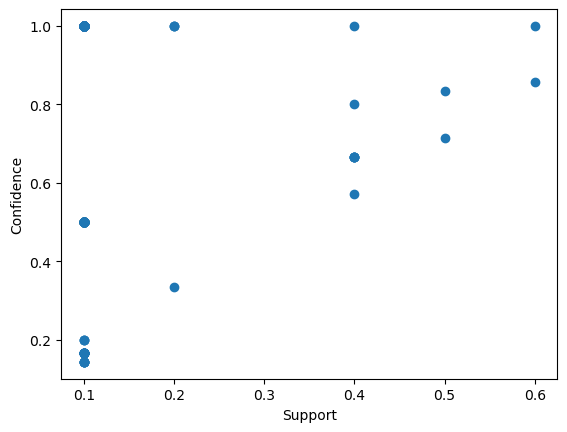

In [24]:
plt.scatter(rule1['support'],rule1['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()

#### 3.Association rule with 20% Support and 90% Confidence

In [25]:
# With 20% Support
set2 = apriori(movie,min_support=0.2,use_colnames=True)

In [26]:
set2

support                           itemsets
0       0.6                      (Sixth Sense)
1       0.7                        (Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
4       0.6                          (Patriot)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Sixth Sense, Patriot)
9       0.2          (Green Mile, Sixth Sense)
10      0.6               (Gladiator, Patriot)
11      0.2                     (LOTR2, LOTR1)
12      0.4  (Sixth Sense, Gladiator, Patriot)

In [27]:
# With 90% Confidence
rule2 = association_rules(set2,metric='lift',min_threshold=0.9)

In [28]:
rule2

antecedents  ... zhangs_metric
0              (Sixth Sense)  ...      0.400000
1                (Gladiator)  ...      0.533333
2              (Sixth Sense)  ...      0.250000
3                  (Patriot)  ...      0.250000
4               (Green Mile)  ...      0.500000
5              (Sixth Sense)  ...      1.000000
6                (Gladiator)  ...      1.000000
7                  (Patriot)  ...      0.750000
8                    (LOTR2)  ...      1.000000
9                    (LOTR1)  ...      1.000000
10  (Sixth Sense, Gladiator)  ...      0.500000
11    (Sixth Sense, Patriot)  ...      0.500000
12      (Gladiator, Patriot)  ...      0.250000
13             (Sixth Sense)  ...      0.250000
14               (Gladiator)  ...      1.000000
15                 (Patriot)  ...      0.625000

[16 rows x 10 columns]

### Visualization

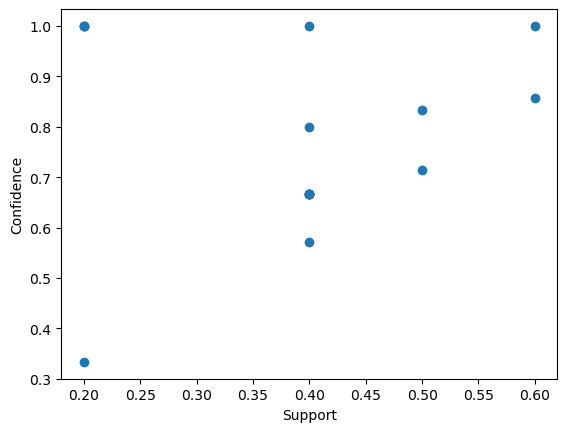

In [29]:
plt.scatter(rule2['support'],rule2['confidence'])
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.show()